# *Projet 7*

## Implémenter un modèle de scoring

In [1]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# List files available
print(os.listdir("home-credit-default-risk"))

['application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'HomeCredit_columns_description.csv', 'installments_payments.csv', 'POS_CASH_balance.csv', 'previous_application.csv', 'sample_submission.csv']


In [3]:
# Training data
app_train = pd.read_csv('home-credit-default-risk/application_train.csv')
print('Training data shape: ', app_train.shape)
app_train.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Testing data features
app_test = pd.read_csv('home-credit-default-risk/application_test.csv')
print('Testing data shape: ', app_test.shape)
app_test.head()

Testing data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


# Exploratory Data Analysis

* Exploratory Data Analysis (EDA) is an open-ended process where we calculate statistics and make figures to find trends, anomalies, patterns, or relationships within the data. The goal of EDA is to learn what our data can tell us. It generally starts out with a high level overview, then narrows in to specific areas as we find intriguing areas of the data. The findings may be interesting in their own right, or they can be used to inform our modeling choices, such as by helping us decide which features to use.



# Examine the Distribution of the Target Column

* The target is what we are asked to predict: either a 0 for the loan was repaid on time, or a 1 indicating the client had payment difficulties. We can first examine the number of loans falling into each category

In [5]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

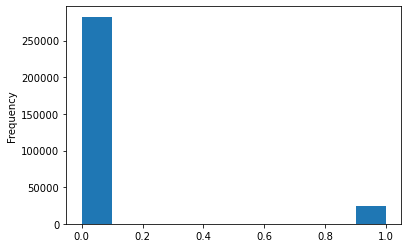

In [6]:
app_train['TARGET'].astype(int).plot.hist();

* From this information, we see this is an imbalanced class problem. There are far more loans that were repaid on time than loans that were not repaid. Once we get into more sophisticated machine learning models, we can weight the classes by their representation in the data to reflect this imbalance.

# Examine Missing Values

* Next we can look at the number and percentage of missing values in each column.

In [7]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [8]:
# Missing values statistics
missing_values = missing_values_table(app_train)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


* When it comes time to build our machine learning models, we will have to fill in these missing values (known as imputation). In later work, we will use models such as XGBoost that can handle missing values with no need for imputation. Another option would be to drop columns with a high percentage of missing values, although it is impossible to know ahead of time if these columns will be helpful to our model. Therefore, we will keep all of the columns for now.

# Column Types

* Let's look at the number of columns of each data type. int64 and float64 are numeric variables (which can be either discrete or continuous). object columns contain strings and are categorical features. .

In [9]:
# Number of each type of column
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [10]:
# Number of unique classes in each object column
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

* Most of the categorical variables have a relatively small number of unique entries. We will need to find a way to deal with these categorical variables!

# Encoding Categorical Variables

* Before we go any further, we need to deal with pesky categorical variables. A machine learning model unfortunately cannot deal with categorical variables (except for some models such as LightGBM). Therefore, we have to find a way to encode (represent) these variables as numbers before handing them off to the model. There are two main ways to carry out this process:

* Label encoding: assign each unique category in a categorical variable with an integer. No new columns are created. An example is shown below


* One-hot encoding: create a new column for each unique category in a categorical variable. Each observation recieves a 1 in the column for its corresponding category and a 0 in all other new columns.

# Label Encoding and One-Hot Encoding

In [11]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [12]:
# one-hot encoding of categorical variables
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)


# Aligning Training and Testing Data

There need to be the same features (columns) in both the training and testing data. One-hot encoding has created more columns in the training data because there were some categorical variables with categories not represented in the testing data. To remove the columns in the training data that are not in the testing data, we need to align the dataframes. First we extract the target column from the training data (because this is not in the testing data but we need to keep this information). When we do the align, we must make sure to set axis = 1 to align the dataframes based on the columns and not on the rows!

In [13]:
train_labels = app_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

# Add the target back in
app_train['TARGET'] = train_labels

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


# Back to Exploratory Data Analysis

## Anomalies

In [14]:
(app_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [15]:
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

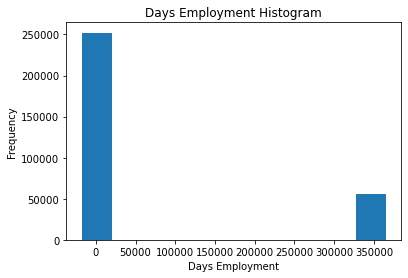

In [16]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [17]:
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


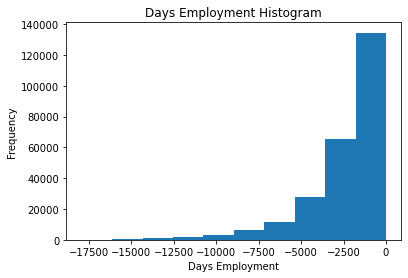

In [18]:
# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [19]:
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print('There are %d anomalies in the test data out of %d entries' % (app_test["DAYS_EMPLOYED_ANOM"].sum(), len(app_test)))

There are 9274 anomalies in the test data out of 48744 entries


# Correlations

In [20]:
# Find correlations with the target and sort
correlations = app_train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati

# Effect of Age on Repayment

In [21]:
# Find the correlation of the positive days since birth and target
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.07823930830982709

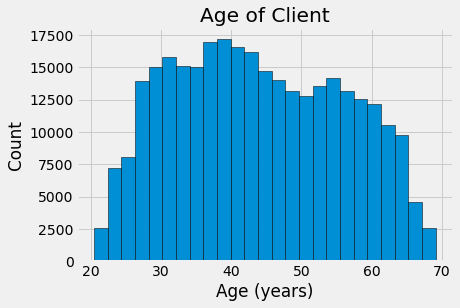

In [22]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

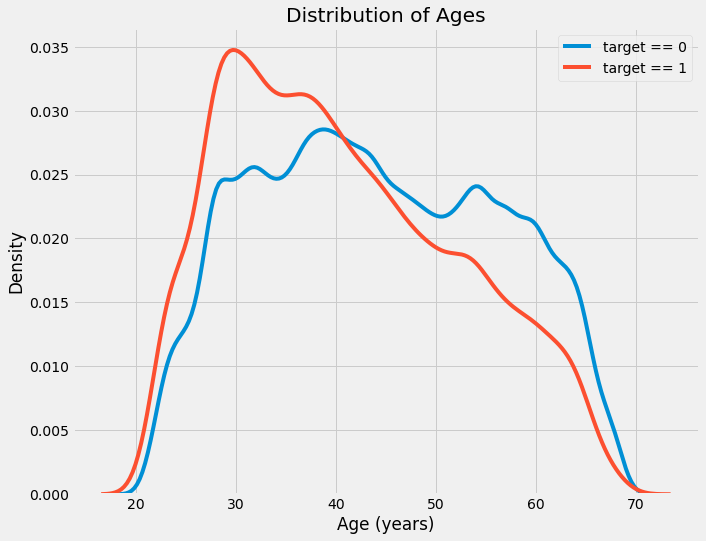

In [23]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')
plt.legend()
# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

In [24]:
# Age information into a separate dataframe
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [25]:
# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


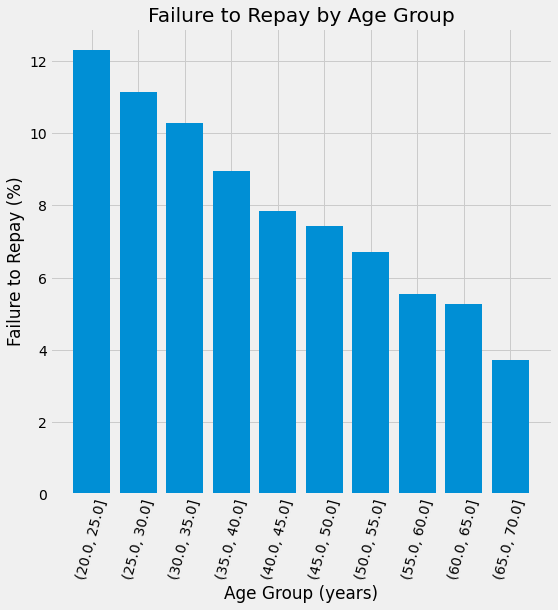

In [26]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

In [27]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


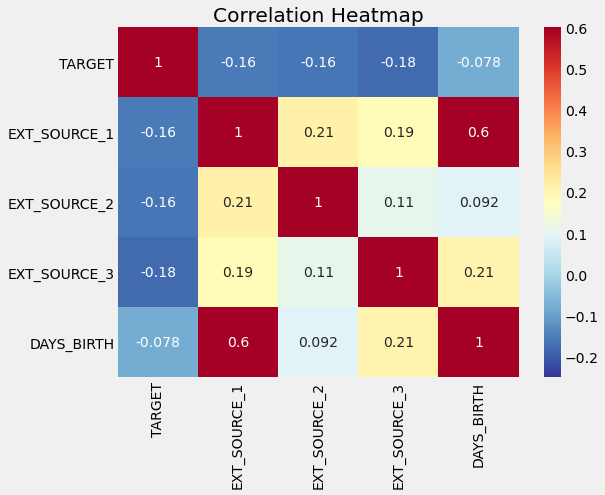

In [28]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

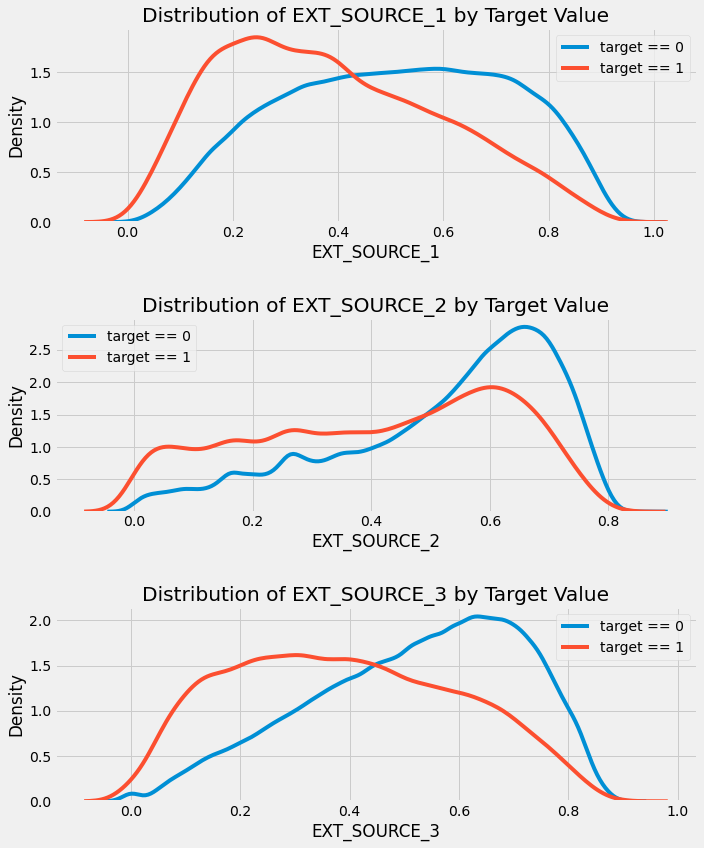

In [29]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    plt.legend()
    
plt.tight_layout(h_pad = 2.5)
    

# Pairs Plot

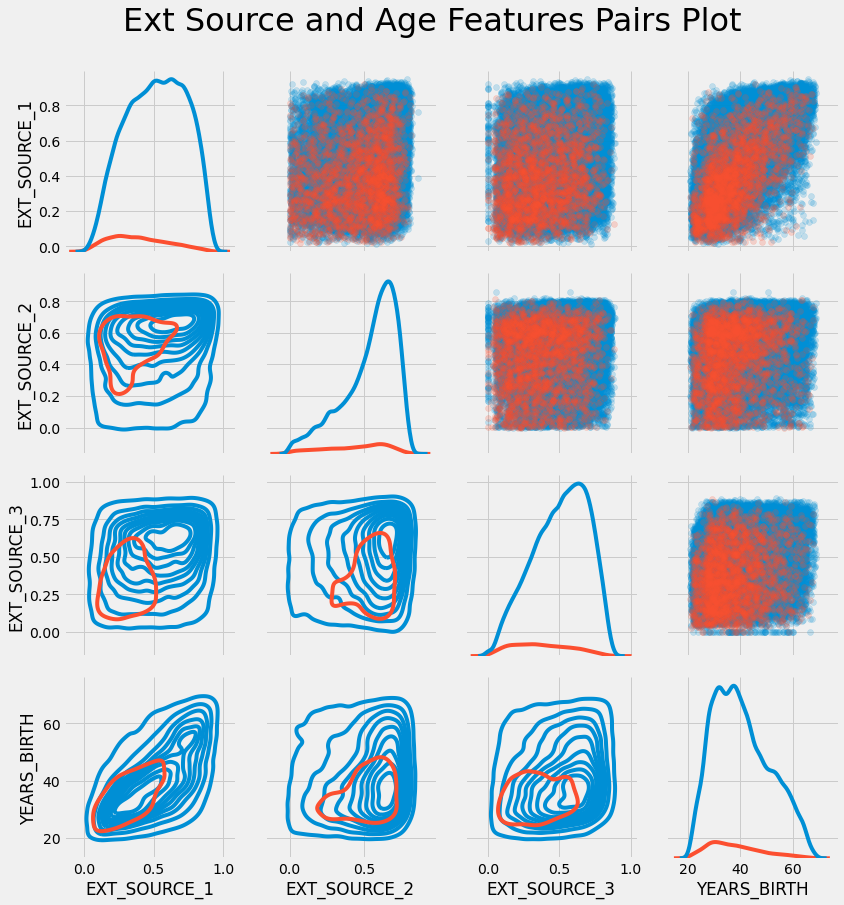

In [30]:
# Copy the data for plotting
plot_data = ext_data.drop(columns = ['DAYS_BIRTH']).copy()

# Add in the age of the client in years
plot_data['YEARS_BIRTH'] = age_data['YEARS_BIRTH']

# Drop na values and limit to first 100000 rows
plot_data = plot_data.dropna().loc[:100000, :]

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False,
                    hue = 'TARGET', 
                    vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

# Upper is a scatter plot
grid.map_upper(plt.scatter, alpha = 0.2)

# Diagonal is a histogram
grid.map_diag(sns.kdeplot)

# Bottom is density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r);

plt.suptitle('Ext Source and Age Features Pairs Plot', size = 32, y = 1.05);

# Feature Engineering

# Polynomial Features

In [31]:
# Make a new dataframe for polynomial features
poly_features = app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = app_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

# imputer for handling missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')

poly_target = poly_features['TARGET']

poly_features = poly_features.drop(columns = ['TARGET'])

# Need to impute missing values
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)

from sklearn.preprocessing import PolynomialFeatures
                                  
# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 3)

In [32]:
# Train the polynomial features
poly_transformer.fit(poly_features)

# Transform the features
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial Features shape: ', poly_features.shape)

Polynomial Features shape:  (307511, 35)


In [33]:
poly_transformer.get_feature_names(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])[:15]

['1',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_3',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^2',
 'EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3^2',
 'EXT_SOURCE_3 DAYS_BIRTH',
 'DAYS_BIRTH^2']

In [34]:
# Create a dataframe of the features 
poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                           'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Add in the target
poly_features['TARGET'] = poly_target

# Find the correlations with the target
poly_corrs = poly_features.corr()['TARGET'].sort_values()

# Display most negative and most positive
print(poly_corrs.head(10))
print(poly_corrs.tail(5))

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181283
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_2 DAYS_BIRTH                  -0.156873
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
Name: TARGET, dtype: float64
DAYS_BIRTH     -0.078239
DAYS_BIRTH^2   -0.076672
DAYS_BIRTH^3   -0.074273
TARGET          1.000000
1                    NaN
Name: TARGET, dtype: float64


In [35]:
# Put test features into dataframe
poly_features_test = pd.DataFrame(poly_features_test, 
                                  columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                                'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Merge polynomial features into training dataframe
poly_features['SK_ID_CURR'] = app_train['SK_ID_CURR']
app_train_poly = app_train.merge(poly_features, on = 'SK_ID_CURR', how = 'left')

# Merge polnomial features into testing dataframe
poly_features_test['SK_ID_CURR'] = app_test['SK_ID_CURR']
app_test_poly = app_test.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left')

# Align the dataframes
app_train_poly, app_test_poly = app_train_poly.align(app_test_poly, join = 'inner', axis = 1)

# Print out the new shapes
print('Training data with polynomial features shape: ', app_train_poly.shape)
print('Testing data with polynomial features shape:  ', app_test_poly.shape)

Training data with polynomial features shape:  (307511, 275)
Testing data with polynomial features shape:   (48744, 275)


# Domain Knowledge Features

In [36]:
app_train_domain = app_train.copy()
app_test_domain = app_test.copy()

app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['ANNUITY_INCOME_PERCENT'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['CREDIT_TERM'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_CREDIT']
app_train_domain['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED'] / app_train_domain['DAYS_BIRTH']

In [37]:
app_test_domain['CREDIT_INCOME_PERCENT'] = app_test_domain['AMT_CREDIT'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['ANNUITY_INCOME_PERCENT'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['CREDIT_TERM'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_CREDIT']
app_test_domain['DAYS_EMPLOYED_PERCENT'] = app_test_domain['DAYS_EMPLOYED'] / app_test_domain['DAYS_BIRTH']

# Visualize New Variables

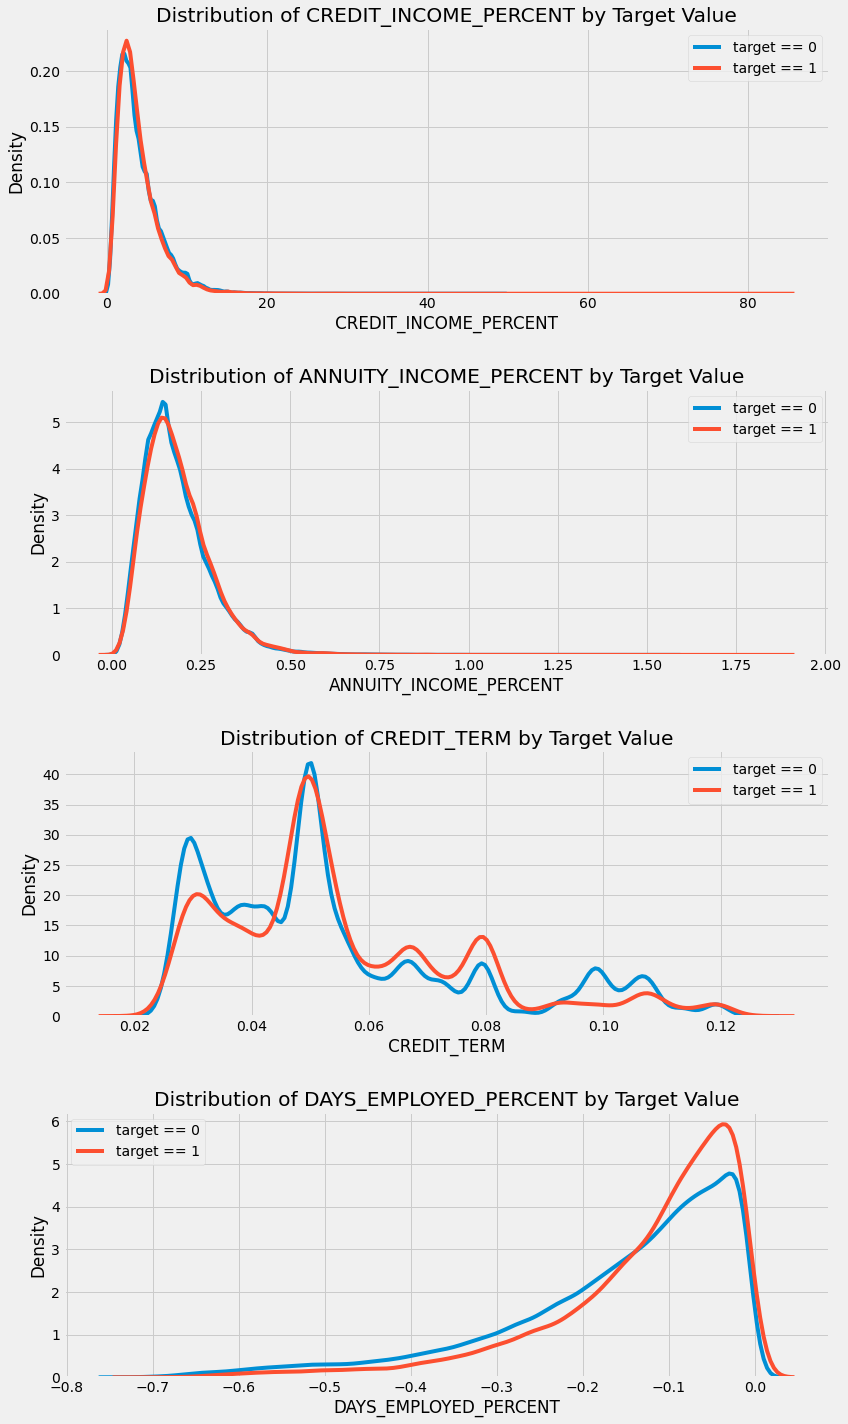

In [38]:
plt.figure(figsize = (12, 20))
# iterate through the new features
for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']):
    
    # create a new subplot for each source
    plt.subplot(4, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 0, feature], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 1, feature], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density');
    plt.legend()
    
plt.tight_layout(h_pad = 2.5)


# Baseline

# Logistic Regression Implementation

In [39]:
def display_scree_plot(acp):
    scree = acp.explained_variance_ratio_*100
    #print(scree)
    #print("Le premier plan factoriel représente {} % de la variance totale.".format(round(scree[0] + scree[1],2)))
    #print("Le deuxième plan factoriel représente {} % de la variance totale.".format(round(scree[2] + scree[3],2)))
    #print("Le troisième plan factoriel représente {} % de la variance totale.".format(round(scree[4] + scree[5],2)))
    plt.figure(figsize=(8, 8))
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

In [40]:
def application_pca(df, taux=0.9):
    
    #n_comp = 40
    pca = PCA(taux)

    X_pca =  pd.DataFrame(pca.fit_transform(df))

    #On appelle la fonction qui trace la courbe des éboulis des valeurs propres
    display_scree_plot(pca)

    return X_pca

In [41]:
def preprocesseur(df_train, df_test):
    
    # Drop the target from the training data
    if "TARGET" in df_train:
        train = df_train.drop(columns = ["TARGET"])
    else:
        train = df_train.copy()
        
    # Feature names
    features = list(train.columns)


    # Median imputation of missing values
    imputer = SimpleImputer(strategy = 'median')

    # Scale each feature to 0-1
    scaler = MinMaxScaler(feature_range = (0, 1))

    # Replace the boolean column by numerics values 
    train["DAYS_EMPLOYED_ANOM"] = train["DAYS_EMPLOYED_ANOM"].astype("int")

    # Fit on the training data
    imputer.fit(train)

    # Transform both training and testing data
    train = imputer.transform(train)
    test = imputer.transform(df_test)

    # Repeat with the scaler
    scaler.fit(train)
    train = scaler.transform(train)
    test = scaler.transform(test)
    
    return train, test

In [42]:
def echantillonage(df_X, df_y):

    X = df_X.copy()
    y = df_y.copy()

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    return X_train, X_test, y_train, y_test

# Preprocessing + Echantillonage des données

In [43]:
%%time

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

app_train.drop(columns="SK_ID_CURR", inplace=True)
app_test.drop(columns="SK_ID_CURR", inplace=True)

print("Preprocessing sans feature engineering")
train, test = preprocesseur(app_train, app_test)
print("Echantillonage : train = 80% | test = 20%")
X_train, X_test, y_train, y_test = echantillonage(train, app_train["TARGET"])
print("X_train shape :", X_train.shape)
print("X_test shape :", X_test.shape)
print("")


app_train_poly.drop(columns="SK_ID_CURR", inplace=True)
app_test_poly.drop(columns="SK_ID_CURR", inplace=True)

print("Preprocessing avec features polynomial")
train_poly, test_poly = preprocesseur(app_train_poly, app_test_poly)
print("Echantillonage : train = 80% | test = 20%")
X_train_poly, X_test_poly, y_train_poly, y_test_poly = echantillonage(train_poly, app_train["TARGET"])
print("X_train shape :", X_train_poly.shape)
print("X_test shape :", X_test_poly.shape)
print("")


app_train_domain.drop(columns="SK_ID_CURR", inplace=True)
app_test_domain.drop(columns="SK_ID_CURR", inplace=True)

print("Preprocessing avec Domain Knowledge features")
train_domain, test_domain = preprocesseur(app_train_domain, app_test_domain)
print("Echantillonage : train = 80% | test = 20%")
X_train_domain, X_test_domain, y_train_domain, y_test_domain = echantillonage(train_domain, app_train["TARGET"])
print("X_train shape :", X_train_domain.shape)
print("X_test shape :", X_test_domain.shape)


Preprocessing sans feature engineering
Echantillonage : train = 80% | test = 20%
X_train shape : (246008, 239)
X_test shape : (61503, 239)

Preprocessing avec features polynomial
Echantillonage : train = 80% | test = 20%
X_train shape : (246008, 274)
X_test shape : (61503, 274)

Preprocessing avec Domain Knowledge features
Echantillonage : train = 80% | test = 20%
X_train shape : (246008, 243)
X_test shape : (61503, 243)
Wall time: 40.6 s


# Logistic regression

In [44]:
def log_reg(df_X_train, df_y_train, df_y_test, df_X_test):
    
    # Make the model with the specified regularization parameter
    log_reg = LogisticRegression(C = 0.0001)

    # Train on the training data
    log_reg.fit(df_X_train, df_y_train)
    
    y_pred = log_reg.predict(df_X_test)

    accuracy = accuracy_score(df_y_test, y_pred)
    
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    
    # Make predictions
    # Make sure to select the second column only
    log_reg_pred = log_reg.predict_proba(df_X_test)[:, 1]
    
    return log_reg_pred

In [45]:
def save_results(df_res, df_pred, new_col, df_index):

    df_pred_lr = pd.DataFrame(df_pred, columns=[new_col], index=df_index.index)

    df_res = pd.concat([df_res, df_pred_lr], sort=False, axis=1)
    
    return df_res

In [46]:
def transform_treshold(df, tresh):
    
    new_df = (df >= tresh).astype("int")
    
    return new_df

# Hypothèse 1 - Sans feature engineering

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# On crée le dataframe de résultats
df_results_base = pd.DataFrame(y_test.values, columns=["y_true"], index=y_test.index)

# On lance les prédictions
log_reg_pred = log_reg(X_train, y_train, y_test, X_test)

# On enregistre les résultats
df_results_base = save_results(df_results_base, log_reg_pred, "y_pred_lr", y_test)

# On "binarise" les probabilités avec un treshold parametré à 0.5
# Par exemple, pour un treshold de 0.5, si la probabilité en est inférieure la valeur sera de 0. Sinon elle sera de 1.
# Et on concatène les données à notre tableau de résultats
df_results_base["y_pred_lr_bin"] = transform_treshold(df_results_base["y_pred_lr"], 0.5)

display(df_results_base.head())
print(df_results_base.shape)

Accuracy: 92.11%


,y_true,y_pred_lr,y_pred_lr_bin
42962,1,0.093096,0
227307,0,0.063556,0
290035,0,0.067366,0
239833,0,0.105164,0
76427,0,0.099360,0


(61503, 3)


# Hypothèse 2 - Avec polynomial features

In [48]:
# On crée le dataframe de résultats
df_results_base_poly = pd.DataFrame(y_test_poly.values, columns=["y_true"], index=y_test_poly.index)

# On lance les prédictions
log_reg_pred = log_reg(X_train_poly, y_train_poly, y_test_poly, X_test_poly)

# On enregistre les résultats
df_results_base_poly = save_results(df_results_base_poly, log_reg_pred, "y_pred_lr_poly", y_test_poly)

# On "binarise" les probabilités avec un treshold parametré à 0.5
# Par exemple, pour un treshold de 0.5, si la probabilité en est inférieure la valeur sera de 0. Sinon elle sera de 1.
# Et on concatène les données à notre tableau de résultats
df_results_base_poly["y_pred_lr_poly_bin"] = transform_treshold(df_results_base_poly["y_pred_lr_poly"], 0.5)

display(df_results_base_poly.head())
print(df_results_base_poly.shape)

Accuracy: 92.11%


,y_true,y_pred_lr_poly,y_pred_lr_poly_bin
42962,1,0.131928,0
227307,0,0.040613,0
290035,0,0.087734,0
239833,0,0.094518,0
76427,0,0.137051,0


(61503, 3)


# Hypothèse 3 - Avec domain knowledge features

In [49]:
# On crée le dataframe de résultats
df_results_base_domain = pd.DataFrame(y_test_domain.values, columns=["y_true"], index=y_test_domain.index)

# On lance les prédictions
log_reg_pred = log_reg(X_train_domain, y_train_domain, y_test_domain, X_test_domain)

# On enregistre les résultats
df_results_base_domain = save_results(df_results_base_domain, log_reg_pred, "y_pred_lr_domain", y_test_domain)

# On "binarise" les probabilités avec un treshold parametré à 0.5
# Par exemple, pour un treshold de 0.5, si la probabilité en est inférieure la valeur sera de 0. Sinon elle sera de 1.
# Et on concatène les données à notre tableau de résultats
df_results_base_domain["y_pred_lr_domain_bin"] = transform_treshold(df_results_base_domain["y_pred_lr_domain"], 0.5)

display(df_results_base_domain.head())
print(df_results_base_domain.shape)

Accuracy: 92.11%


,y_true,y_pred_lr_domain,y_pred_lr_domain_bin
42962,1,0.093490,0
227307,0,0.063669,0
290035,0,0.066947,0
239833,0,0.104526,0
76427,0,0.098586,0


(61503, 3)


# Confusion matrix

In [50]:
def aff_confusion_matrix(df_true, df_pred):

    conf_mat = confusion_matrix(df_true, df_pred)

    print('Confusion matrix:\n', conf_mat)

    labels = ['Class 0', 'Class 1']
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('Expected')
    plt.show()

Confusion matrix:
 [[56648     0]
 [ 4855     0]]


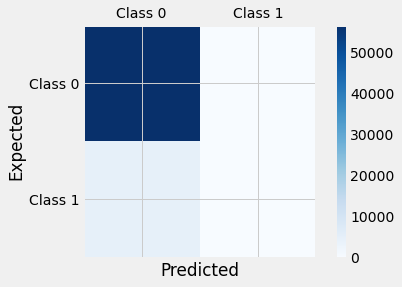

Confusion matrix:
 [[56648     0]
 [ 4855     0]]


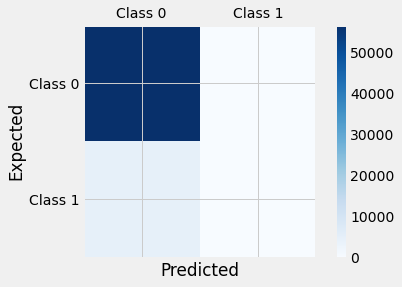

Confusion matrix:
 [[56648     0]
 [ 4855     0]]


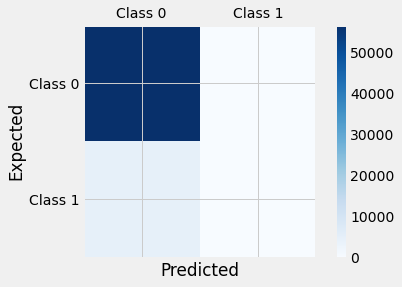

In [51]:
from sklearn.metrics import confusion_matrix

aff_confusion_matrix(df_results_base["y_true"], df_results_base["y_pred_lr_bin"])

aff_confusion_matrix(df_results_base_poly["y_true"], df_results_base_poly["y_pred_lr_poly_bin"])

aff_confusion_matrix(df_results_base_domain["y_true"], df_results_base_domain["y_pred_lr_domain_bin"])

In [52]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

df_metrics_base = pd.DataFrame(columns=["Accuracy", "Precision", "Recall", "F1_score"], index=["sans_feat_eng", "poly_feat", "domain_feat"])

df_metrics_base["Accuracy"][0] = round(accuracy_score(df_results_base["y_true"], df_results_base.iloc[:, 2]), 2)
df_metrics_base["Precision"][0] = round(precision_score(df_results_base["y_true"], df_results_base.iloc[:, 2]), 2)
df_metrics_base["Recall"][0] = round(recall_score(df_results_base["y_true"], df_results_base.iloc[:, 2]), 2)
df_metrics_base["F1_score"][0] = round(f1_score(df_results_base["y_true"], df_results_base.iloc[:, 2]), 2)

df_metrics_base["Accuracy"][1] = round(accuracy_score(df_results_base_poly["y_true"], df_results_base_poly.iloc[:, 2]), 2)
df_metrics_base["Precision"][1] = round(precision_score(df_results_base_poly["y_true"], df_results_base_poly.iloc[:, 2]), 2)
df_metrics_base["Recall"][1] = round(recall_score(df_results_base_poly["y_true"], df_results_base_poly.iloc[:, 2]), 2)
df_metrics_base["F1_score"][1] = round(f1_score(df_results_base_poly["y_true"], df_results_base_poly.iloc[:, 2]), 2)

df_metrics_base["Accuracy"][2] = round(accuracy_score(df_results_base_domain["y_true"], df_results_base_domain.iloc[:, 2]), 2)
df_metrics_base["Precision"][2] = round(precision_score(df_results_base_domain["y_true"], df_results_base_domain.iloc[:, 2]), 2)
df_metrics_base["Recall"][2] = round(recall_score(df_results_base_domain["y_true"], df_results_base_domain.iloc[:, 2]), 2)
df_metrics_base["F1_score"][2] = round(f1_score(df_results_base_domain["y_true"], df_results_base_domain.iloc[:, 2]), 2)

df_metrics_base

,Accuracy,Precision,Recall,F1_score
sans_feat_eng,0.92,0,0,0
poly_feat,0.92,0,0,0
domain_feat,0.92,0,0,0


# Resampling

In [53]:
print("RAPPEL - DESEQUILIBRAGE DES DONNEES")

percent0 = (y_train.value_counts()[0] / y_train.shape) * 100
percent1 = (y_train.value_counts()[1] / y_train.shape) * 100

print("Nombre d'individus pour la classe 0 :", y_train.value_counts()[0], ". Soit", percent0, "% de la population.")
print("Nombre d'individus pour la classe 1 :", y_train.value_counts()[1], ". Soit", percent1, "% de la population.")

RAPPEL - DESEQUILIBRAGE DES DONNEES
Nombre d'individus pour la classe 0 : 226038 . Soit [91.88237781] % de la population.
Nombre d'individus pour la classe 1 : 19970 . Soit [8.11762219] % de la population.


Class 0: 226038
Class 1: 19970
Proportion: 11.32 : 1


([<matplotlib.patches.Wedge at 0x1b43eeaf7f0>,
 [Text(-0.2774940275746891, -1.0644233484194048, 'Classe 0'),
  Text(0.3027207573542064, 1.1611891073666234, 'Classe 1')],
 [Text(-0.1513603786771031, -0.5805945536833117, '91.9%'),
  Text(0.1765871084566204, 0.6773603126305303, '8.1%')])

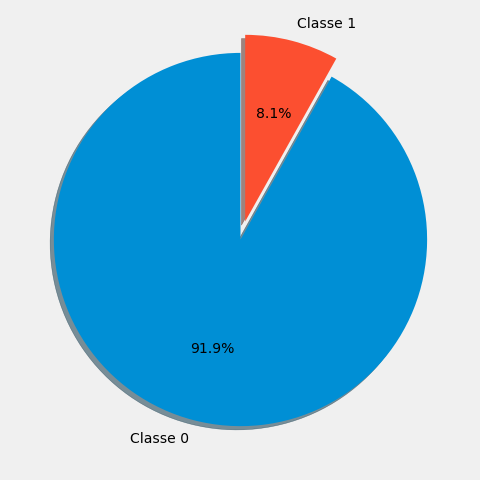

In [54]:
target_count = y_train.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

plt.figure(figsize=(8,8))

plt.pie(target_count, explode=[0, 0.1], labels=["Classe 0", "Classe 1"], autopct='%1.1f%%',
        shadow=True, startangle=90)

In [55]:
import imblearn

# Sans feature engineering

In [56]:
# On détermine la taille de l'échantillon pour les études
n_sample = 10000

In [57]:
%%time
import imblearn
from imblearn.under_sampling  import RandomUnderSampler
#from imblearn.over_sampling import SMOTE
from collections import Counter

#print("Construction echantillonage d'étude")
#X_train_etude = app_train.sample(n_sample)
#y_train_etude = app_train["TARGET"][X_train_etude.index]
#print("Nombre de features après PCA :", X_train_etude.shape[1])

print("Preprocessing")
train, test = preprocesseur(app_train, app_test)

print("Resampling")
smt = RandomUnderSampler()

X_smt, y_smt = smt.fit_resample(train, app_train["TARGET"])

print('Original dataset shape %s' % Counter(app_train["TARGET"]))
print('Resampled dataset shape %s' % Counter(y_smt))

Preprocessing
Resampling
Original dataset shape Counter({0: 282686, 1: 24825})
Resampled dataset shape Counter({0: 24825, 1: 24825})
Wall time: 11.6 s


# Avec polynomial features

In [58]:
%%time

print("Preprocessing")
train_poly, test_poly = preprocesseur(app_train_poly, app_test_poly)

print("Resampling")
X_smt_poly, y_smt_poly = smt.fit_resample(train_poly, app_train["TARGET"])

print('Original dataset shape %s' % Counter(app_train["TARGET"]))
print('Resampled dataset shape %s' % Counter(y_smt_poly))

Preprocessing
Resampling
Original dataset shape Counter({0: 282686, 1: 24825})
Resampled dataset shape Counter({0: 24825, 1: 24825})
Wall time: 14.7 s


# Avec domain knowledge features

In [59]:
%%time

print("Preprocessing")
train_domain, test_domain = preprocesseur(app_train_domain, app_test_domain)

print("Resampling")
X_smt_domain, y_smt_domain = smt.fit_resample(train_domain, app_train["TARGET"])

print('Original dataset shape %s' % Counter(app_train["TARGET"]))
print('Resampled dataset shape %s' % Counter(y_smt_domain))

Preprocessing
Resampling
Original dataset shape Counter({0: 282686, 1: 24825})
Resampled dataset shape Counter({0: 24825, 1: 24825})
Wall time: 11.4 s


Class 0: 24825
Class 1: 24825
Proportion: 1.0 : 1


([<matplotlib.patches.Wedge at 0x1b4450ab9d0>,
 [Text(-1.1, 1.3471114790620887e-16, 'Classe 0'),
  Text(1.2000000000000002, -2.939152317953648e-16, 'Classe 1')],
 [Text(-0.6, 7.347880794884119e-17, '50.0%'),
  Text(0.7, -1.7145055188062944e-16, '50.0%')])

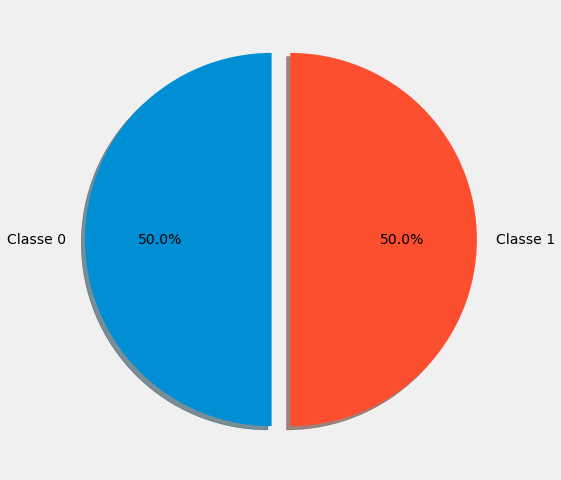

In [60]:
target_count = y_smt.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

plt.figure(figsize=(8,8))

plt.pie(target_count, explode=[0, 0.1], labels=["Classe 0", "Classe 1"], autopct='%1.1f%%',
        shadow=True, startangle=90)

# Analyse de la baseline

In [61]:
# On crée le dataframe de résultats
df_results_base = pd.DataFrame(y_test.values, columns=["y_true"], index=y_test.index)

# On lance les prédictions
log_reg_pred = log_reg(X_smt, y_smt, y_test, X_test)

# On enregistre les résultats
df_results_base = save_results(df_results_base, log_reg_pred, "y_pred_lr", y_test)

# On "binarise" les probabilités avec un treshold parametré à 0.5
# Par exemple, pour un treshold de 0.5, si la probabilité en est inférieure la valeur sera de 0. Sinon elle sera de 1.
# Et on concatène les données à notre tableau de résultats
df_results_base["y_pred_lr_bin"] = transform_treshold(df_results_base["y_pred_lr"], 0.5)

display(df_results_base.head())
print(df_results_base.shape)

Accuracy: 61.30%


,y_true,y_pred_lr,y_pred_lr_bin
42962,1,0.523065,1
227307,0,0.437063,0
290035,0,0.444967,0
239833,0,0.557599,1
76427,0,0.529252,1


(61503, 3)


In [62]:
# On crée le dataframe de résultats
df_results_base_poly = pd.DataFrame(y_test_poly.values, columns=["y_true"], index=y_test_poly.index)

# On lance les prédictions
log_reg_pred = log_reg(X_smt_poly, y_smt_poly, y_test_poly, X_test_poly)

# On enregistre les résultats
df_results_base_poly = save_results(df_results_base_poly, log_reg_pred, "y_pred_lr_poly", y_test_poly)

# On "binarise" les probabilités avec un treshold parametré à 0.5
# Par exemple, pour un treshold de 0.5, si la probabilité en est inférieure la valeur sera de 0. Sinon elle sera de 1.
# Et on concatène les données à notre tableau de résultats
df_results_base_poly["y_pred_lr_poly_bin"] = transform_treshold(df_results_base_poly["y_pred_lr_poly"], 0.5)

display(df_results_base_poly.head())
print(df_results_base_poly.shape)

Accuracy: 64.81%


,y_true,y_pred_lr_poly,y_pred_lr_poly_bin
42962,1,0.591071,1
227307,0,0.344022,0
290035,0,0.501413,1
239833,0,0.527912,1
76427,0,0.600186,1


(61503, 3)


In [63]:
# On crée le dataframe de résultats
df_results_base_domain = pd.DataFrame(y_test_domain.values, columns=["y_true"], index=y_test_domain.index)

# On lance les prédictions
log_reg_pred = log_reg(X_smt_domain, y_smt_domain, y_test_domain, X_test_domain)

# On enregistre les résultats
df_results_base_domain = save_results(df_results_base_domain, log_reg_pred, "y_pred_lr_domain", y_test_domain)

# On "binarise" les probabilités avec un treshold parametré à 0.5
# Par exemple, pour un treshold de 0.5, si la probabilité en est inférieure la valeur sera de 0. Sinon elle sera de 1.
# Et on concatène les données à notre tableau de résultats
df_results_base_domain["y_pred_lr_domain_bin"] = transform_treshold(df_results_base_domain["y_pred_lr_domain"], 0.5)

display(df_results_base_domain.head())
print(df_results_base_domain.shape)

Accuracy: 60.91%


,y_true,y_pred_lr_domain,y_pred_lr_domain_bin
42962,1,0.523452,1
227307,0,0.438335,0
290035,0,0.448784,0
239833,0,0.554609,1
76427,0,0.526928,1


(61503, 3)


Confusion matrix:
 [[34581 22067]
 [ 1737  3118]]


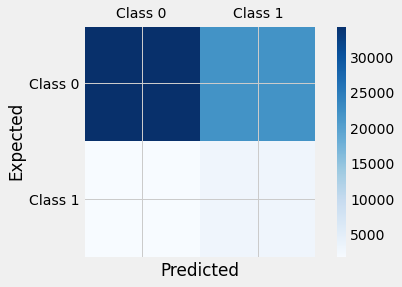

Confusion matrix:
 [[36521 20127]
 [ 1517  3338]]


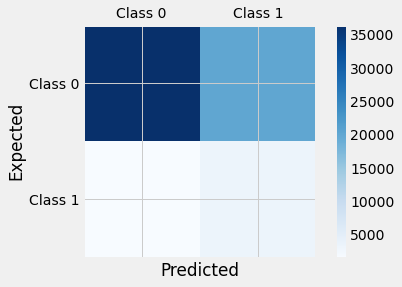

Confusion matrix:
 [[34332 22316]
 [ 1724  3131]]


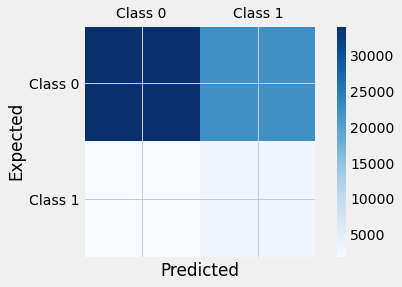

In [64]:
aff_confusion_matrix(df_results_base["y_true"], df_results_base["y_pred_lr_bin"])

aff_confusion_matrix(df_results_base_poly["y_true"], df_results_base_poly["y_pred_lr_poly_bin"])

aff_confusion_matrix(df_results_base_domain["y_true"], df_results_base_domain["y_pred_lr_domain_bin"])

In [65]:
df_metrics_base = pd.DataFrame(columns=["Accuracy", "Precision", "Recall", "F1_score"], index=["sans_feat_eng", "poly_feat", "domain_feat"])

df_metrics_base["Accuracy"][0] = round(accuracy_score(df_results_base["y_true"], df_results_base.iloc[:, 2]), 2)
df_metrics_base["Precision"][0] = round(precision_score(df_results_base["y_true"], df_results_base.iloc[:, 2]), 2)
df_metrics_base["Recall"][0] = round(recall_score(df_results_base["y_true"], df_results_base.iloc[:, 2]), 2)
df_metrics_base["F1_score"][0] = round(f1_score(df_results_base["y_true"], df_results_base.iloc[:, 2]), 2)

df_metrics_base["Accuracy"][1] = round(accuracy_score(df_results_base_poly["y_true"], df_results_base_poly.iloc[:, 2]), 2)
df_metrics_base["Precision"][1] = round(precision_score(df_results_base_poly["y_true"], df_results_base_poly.iloc[:, 2]), 2)
df_metrics_base["Recall"][1] = round(recall_score(df_results_base_poly["y_true"], df_results_base_poly.iloc[:, 2]), 2)
df_metrics_base["F1_score"][1] = round(f1_score(df_results_base_poly["y_true"], df_results_base_poly.iloc[:, 2]), 2)

df_metrics_base["Accuracy"][2] = round(accuracy_score(df_results_base_domain["y_true"], df_results_base_domain.iloc[:, 2]), 2)
df_metrics_base["Precision"][2] = round(precision_score(df_results_base_domain["y_true"], df_results_base_domain.iloc[:, 2]), 2)
df_metrics_base["Recall"][2] = round(recall_score(df_results_base_domain["y_true"], df_results_base_domain.iloc[:, 2]), 2)
df_metrics_base["F1_score"][2] = round(f1_score(df_results_base_domain["y_true"], df_results_base_domain.iloc[:, 2]), 2)

df_metrics_base

,Accuracy,Precision,Recall,F1_score
sans_feat_eng,0.61,0.12,0.64,0.21
poly_feat,0.65,0.14,0.69,0.24
domain_feat,0.61,0.12,0.64,0.21


# Conclusion sur features engineering

# Mise en place et optimisation de modèles

Nous allons entraîner plusieurs modèles sur un échantillon de 10000 lignes avant resampling et choisir le plus performant.

Le resampling étant une tâche assez lourde en temps de calcul et le randomizedsearchCV aussi, nous devons réduire considérablement notre jeu de données pour cette étape.

Nous allons mesurer à chaque fois :

le taux de TP, TN, FP, FN
la précision
le recall
le Fi
l'accuracy

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
import xgboost as xgb

from sklearn.neural_network import MLPClassifier

from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold

In [67]:
df_results = pd.DataFrame(y_test_domain.values, columns=["y_true"], index=y_test_domain.index)

# Régression logistique

In [68]:
%%time

# Make the model with the specified regularization parameter
clf_lr = LogisticRegression(C=10)

# Train on the training data
clf_lr.fit(X_smt_domain, y_smt_domain)

# Make predictions
# Make sure to select the second column only
lr_pred_smoted = clf_lr.predict_proba(X_test_domain)[:, 1]

# Submission dataframe
df_results["y_pred_lr_smoted"] = lr_pred_smoted

df_results.head()

Wall time: 1.81 s


,y_true,y_pred_lr_smoted
42962,1,0.812449
227307,0,0.276289
290035,0,0.476117
239833,0,0.352550
76427,0,0.792664


In [69]:
df_results["y_pred_lr_smoted_bin"] = transform_treshold(df_results["y_pred_lr_smoted"], 0.5)

df_results.head()

,y_true,y_pred_lr_smoted,y_pred_lr_smoted_bin
42962,1,0.812449,1
227307,0,0.276289,0
290035,0,0.476117,0
239833,0,0.352550,0
76427,0,0.792664,1


# Random Forest

In [70]:
%%time

# Make the model with the specified regularization parameter
clf_rf = RandomForestClassifier(n_estimators=1000,
                                max_depth=10
                               )

# Train on the training data
clf_rf.fit(X_smt_domain, y_smt_domain)

# Make predictions
# Make sure to select the second column only
rf_pred_smoted = clf_rf.predict_proba(X_test_domain)[:, 1]

# Submission dataframe
df_results["y_pred_rf_smoted"] = rf_pred_smoted

df_results.head()

Wall time: 2min 17s


,y_true,y_pred_lr_smoted,y_pred_lr_smoted_bin,y_pred_rf_smoted
42962,1,0.812449,1,0.661358
227307,0,0.276289,0,0.274893
290035,0,0.476117,0,0.450587
239833,0,0.352550,0,0.430481
76427,0,0.792664,1,0.613718


In [71]:
df_results["y_pred_rf_smoted_bin"] = transform_treshold(df_results["y_pred_rf_smoted"], 0.5)

df_results.head()

,y_true,y_pred_lr_smoted,y_pred_lr_smoted_bin,y_pred_rf_smoted,y_pred_rf_smoted_bin
42962,1,0.812449,1,0.661358,1
227307,0,0.276289,0,0.274893,0
290035,0,0.476117,0,0.450587,0
239833,0,0.352550,0,0.430481,0
76427,0,0.792664,1,0.613718,1


# XGBoost

In [72]:
clf_xgb = xgb.XGBClassifier(objective="binary:logistic",
                            random_state=0)

clf_xgb.fit(X_smt_domain, y_smt_domain)

# Make predictions
# Make sure to select the second column only
xgb_pred_smoted = clf_xgb.predict_proba(X_test_domain)[:, 1]

# Submission dataframe
df_results["y_pred_xgb_smoted"] = xgb_pred_smoted
    
df_results.head()

[01:20:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,y_true,y_pred_lr_smoted,y_pred_lr_smoted_bin,y_pred_rf_smoted,y_pred_rf_smoted_bin,y_pred_xgb_smoted
42962,1,0.812449,1,0.661358,1,0.856552
227307,0,0.276289,0,0.274893,0,0.215152
290035,0,0.476117,0,0.450587,0,0.383801
239833,0,0.352550,0,0.430481,0,0.206231
76427,0,0.792664,1,0.613718,1,0.922643


In [73]:
df_results["y_pred_xgb_smoted_bin"] = transform_treshold(df_results["y_pred_xgb_smoted"], 0.5)

df_results.head()

,y_true,y_pred_lr_smoted,y_pred_lr_smoted_bin,y_pred_rf_smoted,y_pred_rf_smoted_bin,y_pred_xgb_smoted,y_pred_xgb_smoted_bin
42962,1,0.812449,1,0.661358,1,0.856552,1
227307,0,0.276289,0,0.274893,0,0.215152,0
290035,0,0.476117,0,0.450587,0,0.383801,0
239833,0,0.352550,0,0.430481,0,0.206231,0
76427,0,0.792664,1,0.613718,1,0.922643,1


# Gradient Boosting Classifier

In [74]:
%%time

# Create the model
clf_lgb = lgb.LGBMClassifier(n_estimators=10000,
                             objective='binary',
                             class_weight='balanced',
                             learning_rate=0.05,
                             reg_alpha=0.1,
                             reg_lambda=0.1,
                             subsample=0.8,
                             n_jobs=-1,
                             random_state=0
                            )

# Train on the training data
clf_lgb.fit(X_smt_poly, y_smt_poly)

# Make predictions
# Make sure to select the second column only
lgb_pred_smoted = clf_lgb.predict_proba(X_test_poly)[:, 1]

# Submission dataframe
df_results["y_pred_lgb_smoted"] = lgb_pred_smoted
    
df_results.head()

Wall time: 4min 23s


,y_true,y_pred_lr_smoted,y_pred_lr_smoted_bin,y_pred_rf_smoted,y_pred_rf_smoted_bin,y_pred_xgb_smoted,y_pred_xgb_smoted_bin,y_pred_lgb_smoted
42962,1,0.812449,1,0.661358,1,0.856552,1,0.975192
227307,0,0.276289,0,0.274893,0,0.215152,0,0.063519
290035,0,0.476117,0,0.450587,0,0.383801,0,0.851547
239833,0,0.352550,0,0.430481,0,0.206231,0,0.033419
76427,0,0.792664,1,0.613718,1,0.922643,1,0.956832


In [75]:
df_results["y_pred_lgb_smoted_bin"] = transform_treshold(df_results["y_pred_lgb_smoted"], 0.5)

df_results.head()

,y_true,y_pred_lr_smoted,y_pred_lr_smoted_bin,y_pred_rf_smoted,y_pred_rf_smoted_bin,y_pred_xgb_smoted,y_pred_xgb_smoted_bin,y_pred_lgb_smoted,y_pred_lgb_smoted_bin
42962,1,0.812449,1,0.661358,1,0.856552,1,0.975192,1
227307,0,0.276289,0,0.274893,0,0.215152,0,0.063519,0
290035,0,0.476117,0,0.450587,0,0.383801,0,0.851547,1
239833,0,0.352550,0,0.430481,0,0.206231,0,0.033419,0
76427,0,0.792664,1,0.613718,1,0.922643,1,0.956832,1


# Analyse des résultats

## Matrice de confusion
* Analysons la matrice de confusion de chaque modèle pour visualiser le nombre de TN, FN, TP, FN.

Matrice confusion régression logistique
Confusion matrix:
 [[38806 17842]
 [ 1544  3311]]


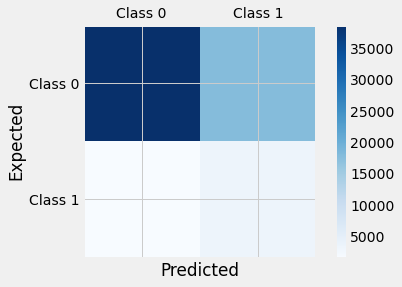

Matrice confusion random forest
Confusion matrix:
 [[38399 18249]
 [ 1190  3665]]


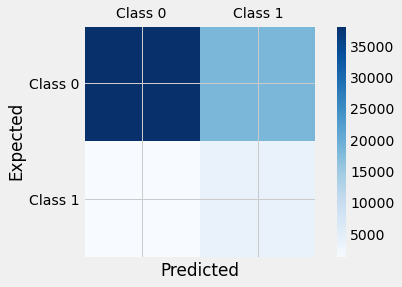

Matrice confusion XGBoost
Confusion matrix:
 [[39514 17134]
 [  889  3966]]


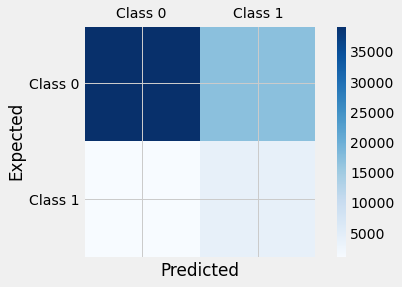

In [76]:
print("Matrice confusion régression logistique")
aff_confusion_matrix(df_results["y_true"], df_results["y_pred_lr_smoted_bin"])

print("Matrice confusion random forest")
aff_confusion_matrix(df_results["y_true"], df_results["y_pred_rf_smoted_bin"])

#print("Matrice confusion LGBMClassifier")
#aff_confusion_matrix(df_results["y_true"], df_results["y_pred_lgb_smoted_bin"])

print("Matrice confusion XGBoost")
aff_confusion_matrix(df_results["y_true"], df_results["y_pred_xgb_smoted_bin"])

# Accuracy, Precision, Recall, F1 score

In [77]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

nb_models = 3

df_metrics = pd.DataFrame(columns=["Accuracy", "Precision", "Recall", "F1_score"], index=["Logistic regression", "Random Forest", "XGBoost"])

# j=3 représente la 3eme colonne du dataframe df_results
# on cible les colonnes de valeurs prédites avec cette variable
j = 2

for i in np.arange(0, nb_models):
    
    df_metrics["Accuracy"][i] = round(accuracy_score(df_results["y_true"], df_results.iloc[:, j]), 2)
    df_metrics["Precision"][i] = round(precision_score(df_results["y_true"], df_results.iloc[:, j]), 2)
    df_metrics["Recall"][i] = round(recall_score(df_results["y_true"], df_results.iloc[:, j]), 2)
    df_metrics["F1_score"][i] = round(f1_score(df_results["y_true"], df_results.iloc[:, j]), 2)
    
    j += 2

df_metrics

,Accuracy,Precision,Recall,F1_score
Logistic regression,0.68,0.16,0.68,0.25
Random Forest,0.68,0.17,0.75,0.27
XGBoost,0.71,0.19,0.82,0.31


# Courbe Receiver Operating Characteristic (ROC) et Area Under the Curve (AUC)
* La courbe ROC est un outil communément utilisé avec les classifieurs binaires. Elle croise le taux de TP avec le taux de FP. Le taux de FP est le pourcentage d'observations négatives qui sont incorrectement classées comme positives. Il est égal à 1 moins le taux de TN, qui est le pourcentage d'observations négatives qui sont correctement classées comme négatives. Le taux de FN est aussi appelé spécificité. Par conséquent la courbe ROC croise sensibilité (ou rappel) et 1-spécificité.

* La meilleure courbe ROC, est celle qui passe le plus dans le coin supérieur gauche du graphique.

* Le score AUC est une façon de comparer des classificateurs. Un classificateur parfait aurait une aire sous la courbe ROC égale à 1, tandis qu'un classificateur purement aléatoire aurait une ROC AUC de 0.5.

In [78]:
from sklearn.metrics import roc_curve

fp_lr, tp_lr, treshold_lr = roc_curve(y_test_domain, lr_pred_smoted)
fp_rf, tp_rf, treshold_rf = roc_curve(y_test_domain, rf_pred_smoted)
#fp_lgb, tp_lgb, treshold_lgb = roc_curve(y_test_poly, lgb_pred_smoted)
fp_xgb, tp_xgb, treshold_xgb = roc_curve(y_test_domain, xgb_pred_smoted)

In [79]:
from sklearn.metrics import roc_auc_score

auc_score_lr = roc_auc_score(y_test_domain, lr_pred_smoted)
auc_score_rf = roc_auc_score(y_test_domain, rf_pred_smoted)
#auc_score_lgb = roc_auc_score(y_test_poly, lgb_pred_smoted)
auc_score_xgb = roc_auc_score(y_test_domain, xgb_pred_smoted)

lst_auc_score = [("Logistic Regression", auc_score_lr),
                ("Random Forest", auc_score_rf),
                #("LGBMClassifier", auc_score_lgb),
                ("XGBoost", auc_score_xgb)]

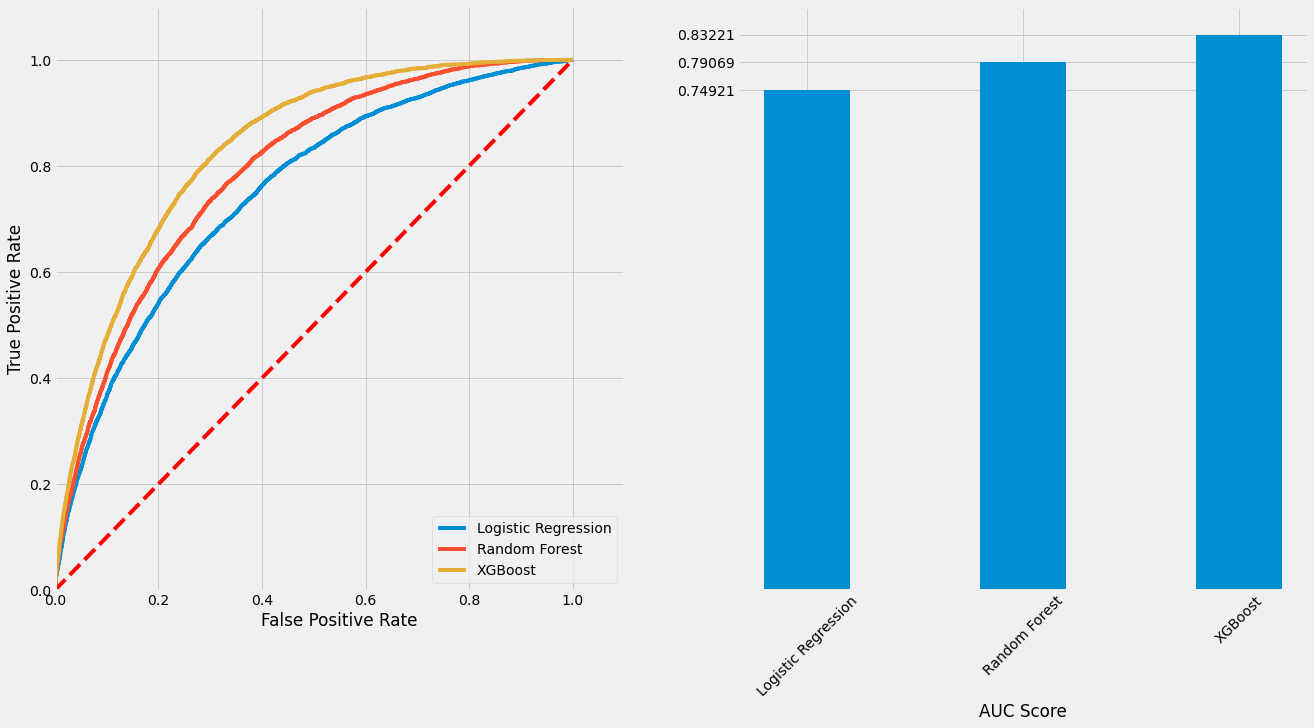

In [80]:
plt.figure(figsize=(20,10))


plt.subplot(1, 2, 1)

plt.plot(fp_lr, tp_lr, label="Logistic Regression")
plt.plot(fp_rf, tp_rf, label="Random Forest")
#plt.plot(fp_lgb, tp_lgb, label="LGBMClassifier")
plt.plot(fp_xgb, tp_xgb, label="XGBoost")
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')


plt.subplot(1, 2, 2)

plt.style.use('fivethirtyeight')

labels, ys = zip(*lst_auc_score)

xs = np.arange(len(labels)) 

width = 0.4

plt.bar(xs, ys, width, align='center')

plt.xlabel("AUC Score")
plt.xticks(xs, labels, rotation=45) #Replace default x-ticks with xs, then replace xs with labels
plt.yticks(ys)
plt.show()


In [81]:
def plot_feature_importances(df):
    """
    Plot importances returned by a model. This can work with any measure of
    feature importance provided that higher importance is better. 
    
    Args:
        df (dataframe): feature importances. Must have the features in a column
        called `features` and the importances in a column called `importance
        
    Returns:
        shows a plot of the 15 most importance features
        
        df (dataframe): feature importances sorted by importance (highest to lowest) 
        with a column for normalized importance
        """
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    return df

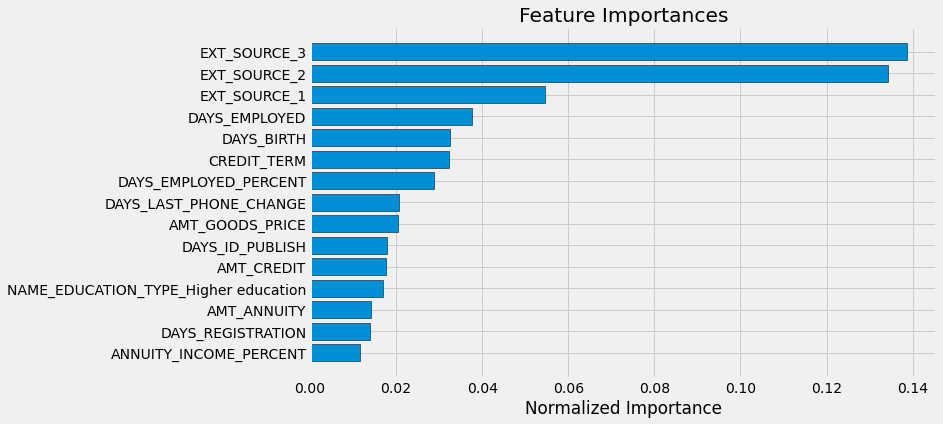

In [82]:
# Make the feature importance dataframe
feature_importances = pd.DataFrame({'feature': app_test_domain.columns, 'importance': clf_rf.feature_importances_})

fi_sorted = plot_feature_importances(feature_importances)

# Conclusion sur la modélisation